In [146]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

output_dir = Path("final_experiments")

In [147]:
files = list(output_dir.glob("param_exp_333_trial*.pkl"))

if not files:
    print("No saved experiment files found.")
    df = pd.DataFrame()  # Initialize an empty DataFrame
else:
    print("Saved experiment files:")
    dfs = []  # List to store DataFrames
    for i, file in enumerate(files):
        print(f"{i}: {file.name}")
        dfs.append(pd.read_pickle(file))
    df_orig = pd.concat(dfs, ignore_index=True)  # Concatenate all DataFrames

Saved experiment files:
0: param_exp_333_trial_4.pkl
1: param_exp_333_trial_5.pkl
2: param_exp_333_trial_2.pkl
3: param_exp_333_trial_3.pkl
4: param_exp_333_trial_1.pkl


In [148]:
df = pd.read_pickle(files[1])
df = df_orig

In [149]:
converged_df = df[df["train_loss_by_iter"].apply(lambda x: x[-1] < 1.25)]
convergence_rate = len(converged_df) / len(df)
convergence_rate

0.62

In [150]:
stalling_df = converged_df[converged_df["train_loss_by_iter"].apply(lambda x: sum(1.35 <= val <= 1.37 for val in x) >= 6)]
stalling_proportion = len(stalling_df) / len(converged_df)
stalling_proportion

0.5806451612903226

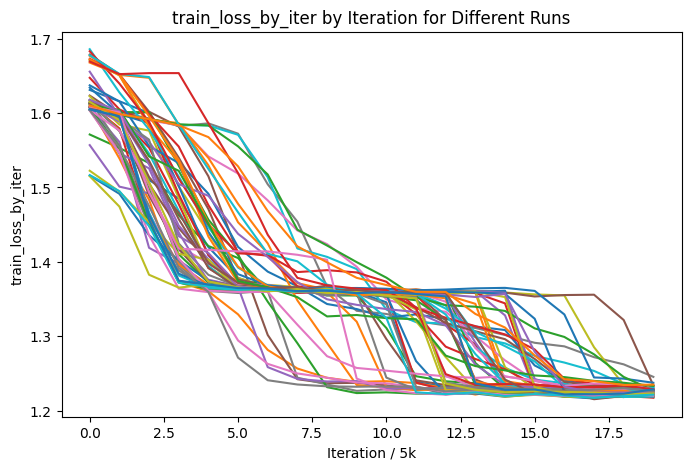

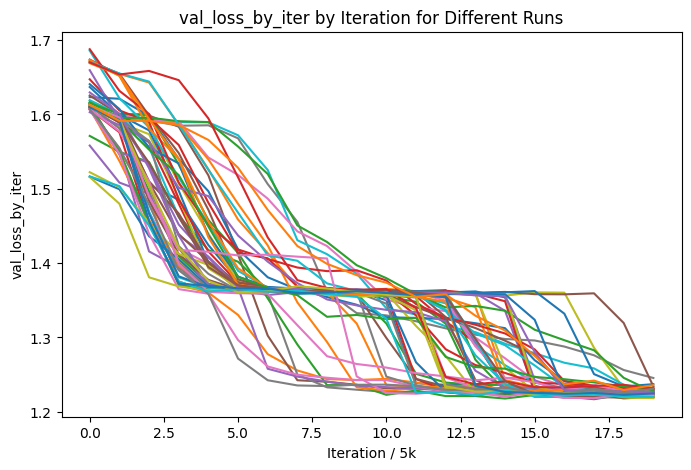

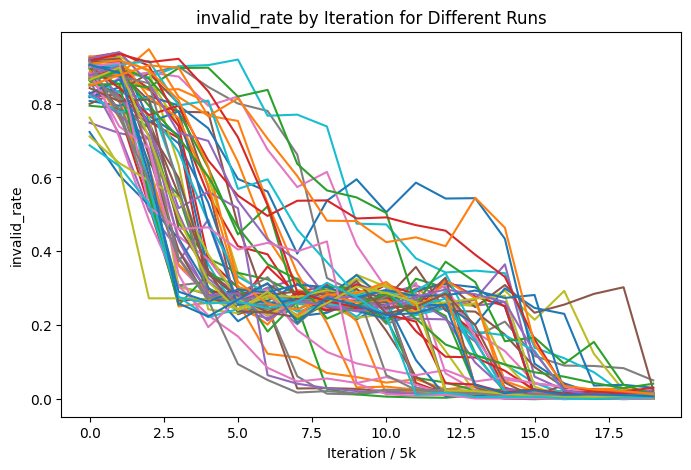

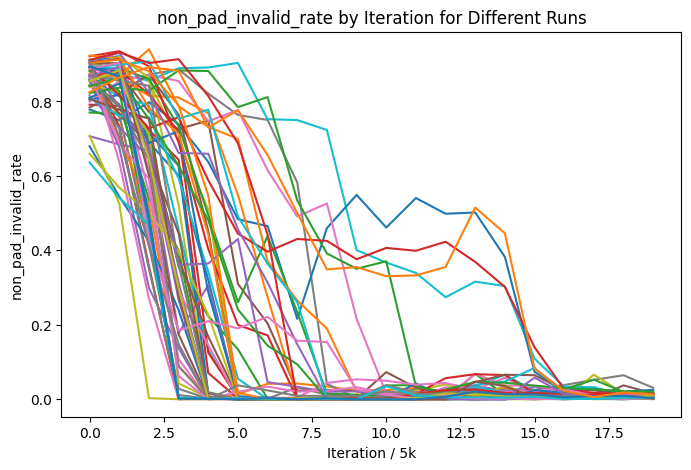

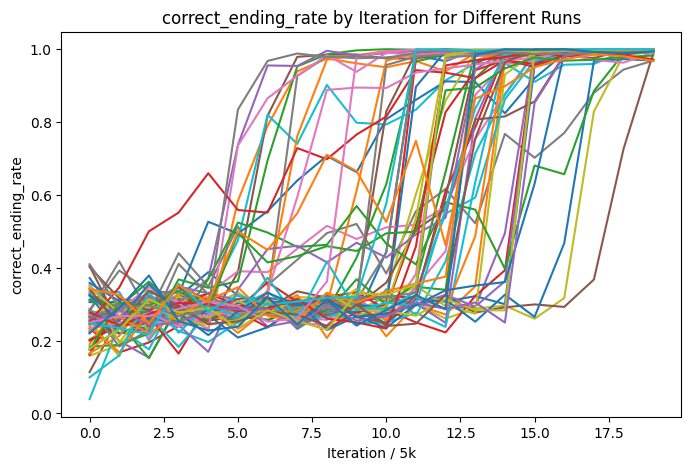

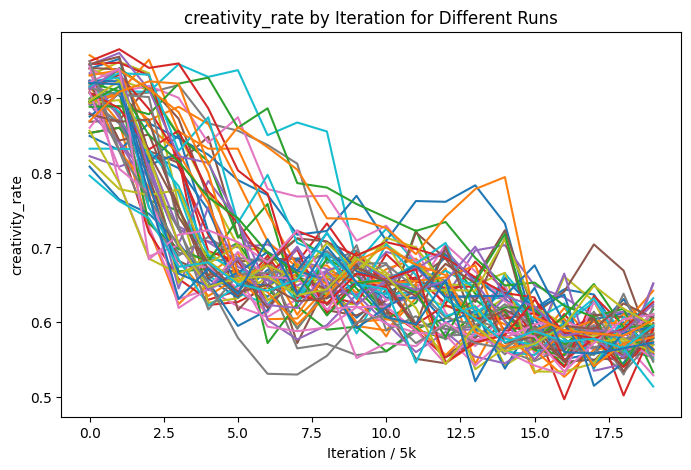

In [152]:
plotting_opt = ['train_loss_by_iter', 'val_loss_by_iter', 'invalid_rate', 
                'non_pad_invalid_rate', 'correct_ending_rate', 'creativity_rate']
for plotting in plotting_opt:
    plt.figure(figsize=(8, 5))
    for idx, row in converged_df.iterrows():
        # plt.plot(row['train_loss_by_iter'], label=f'Run {idx}')
        # plt.plot(row['val_loss_by_iter'], label=f'Run {idx} validation')
        plt.plot(row[plotting], label=f'Run {idx}')

    # plt.axhline(y=np.average(df['expected_perfect_model_loss_by_iter']), color='black', label="Expected Perfect Model Loss")


    plt.xlabel('Iteration / 5k')
    plt.ylabel(plotting)
    plt.title(f'{plotting} by Iteration for Different Runs')
    plt.show()

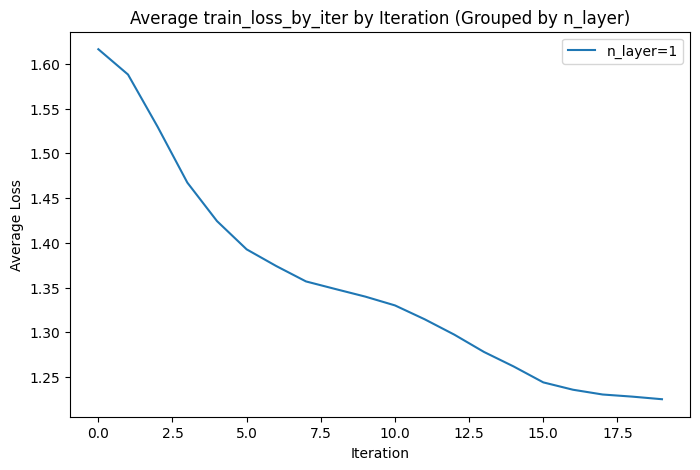

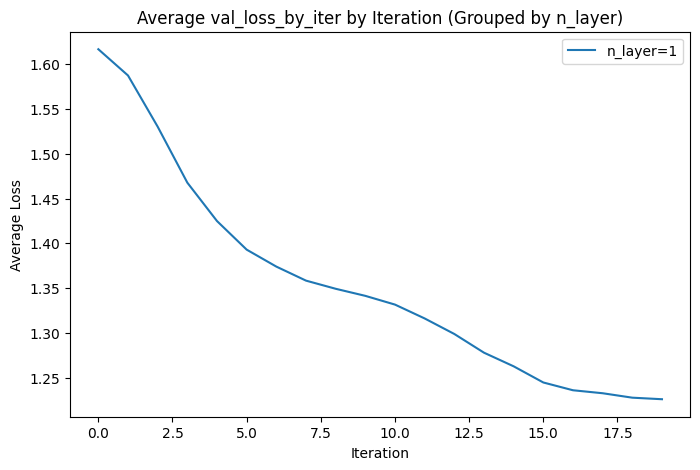

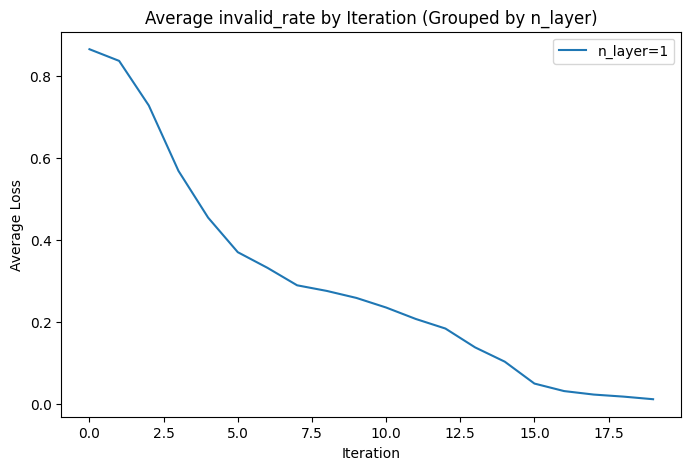

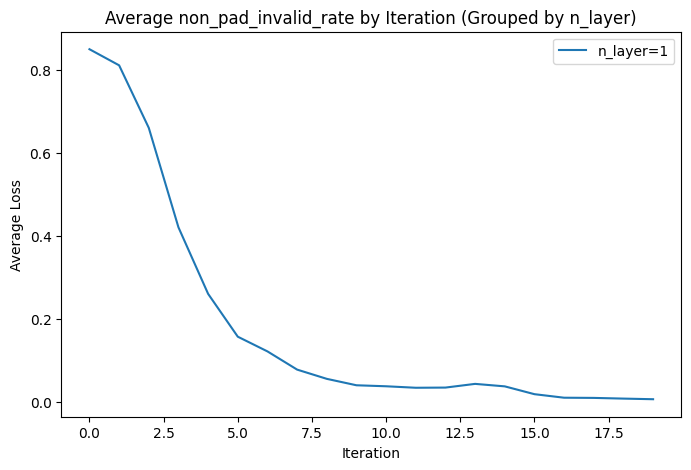

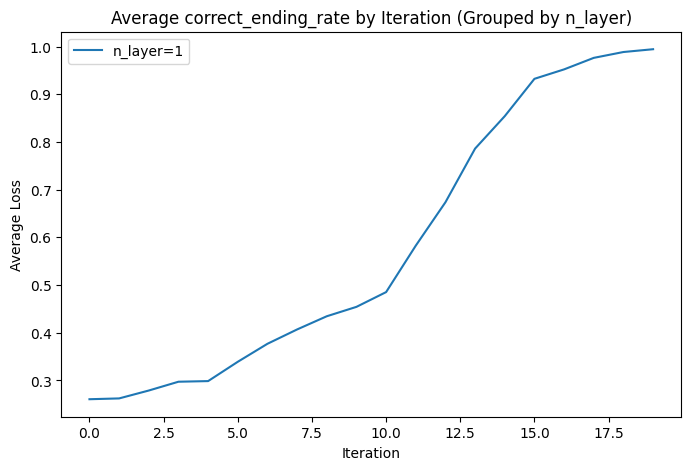

In [153]:
groupby_vars = ['n_layer',]# 'n_head', 'n_embd']
for groupby_var in groupby_vars:
    for loss_type in ['train_loss_by_iter', 'val_loss_by_iter', 'invalid_rate', 'non_pad_invalid_rate', 'correct_ending_rate']:
        grouped = converged_df.groupby(groupby_var)[loss_type]

        # Compute the average loss at each iteration
        avg_loss_by_iter = grouped.apply(lambda x: np.mean(np.vstack(x), axis=0))

        # Plot results
        plt.figure(figsize=(8, 5))
        for var, avg_loss in avg_loss_by_iter.items():
            plt.plot(avg_loss, label=f'{groupby_var}={var}')
            
        plt.xlabel('Iteration')
        plt.ylabel('Average Loss')
        plt.title(f'Average {loss_type} by Iteration (Grouped by {groupby_var})')
        plt.legend()
        plt.show()